<h3>building a FCFNN based 10 class classifier
training and testing the classifier by using MNIST dataset</h3>


In [2]:
import tensorflow as ts 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

In [6]:
(x,y),(x_test,y_test)=mnist.load_data()
x_train=x[:5000]
y_train=y[:5000]

x_val=x[5000:]
y_val=y[5000:]

print("x_train shape: "+str(x_train.shape))
print("y_train shape: "+str(y_train.shape))
print("x_val shape: "+str(x_val.shape))
print("y_val shape: "+str(y_val.shape))

x_train shape: (5000, 28, 28)
y_train shape: (5000,)
x_val shape: (55000, 28, 28)
y_val shape: (55000,)


In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50


/home/mylove/4.1/AI lab /venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4610 - loss: 5.5606 - val_accuracy: 0.6243 - val_loss: 1.3107
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7492 - loss: 0.8744 - val_accuracy: 0.7722 - val_loss: 0.8946
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8504 - loss: 0.5448 - val_accuracy: 0.8097 - val_loss: 0.7475
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8924 - loss: 0.3891 - val_accuracy: 0.8413 - val_loss: 0.7182
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9200 - loss: 0.3025 - val_accuracy: 0.8507 - val_loss: 0.6808
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9338 - loss: 0.2392 - val_accuracy: 0.8585 - val_loss: 0.7193
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9460 - loss: 0.1957 - val_accuracy: 0.8763 - val_loss: 0.6095
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9614 - loss: 0.1371 - val_accuracy: 0.889

In [12]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

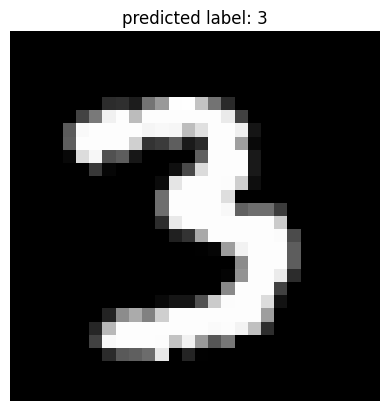

In [ ]:
# -- visualization --

test_img=x_test[500]

pred=model.predict(test_img.reshape(1,28,28))
pred=np.argmax(pred)
plt.imshow(test_img,cmap='gray')
plt.title("predicted label: "+str(pred))
plt.axis('off')


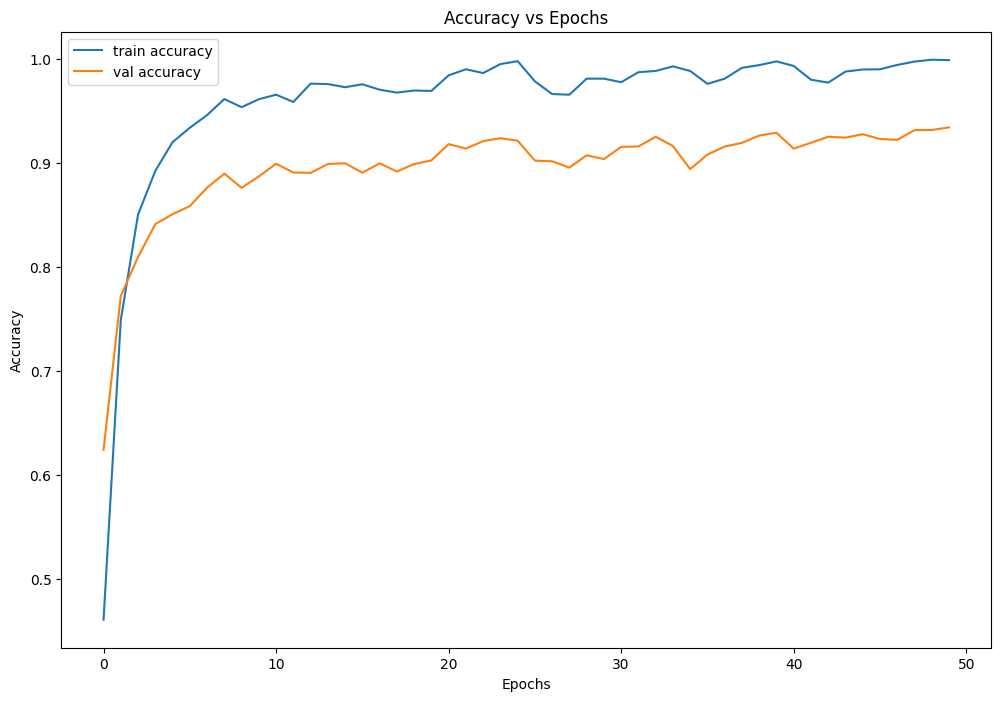

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
plt.plot(model.history.history['accuracy'],label='train accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()    